# Data Scientist vs Data Analyst Comparison

In [1]:
# Import Required Python Packages
import pandas as pd
import pandasql as pq # will do sql queries on python 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'ticks', palette = ['#47b0aa','#e57872'], rc = {'axes.facecolor':'#e0e0e0'})

# Data Collection And Cleaning

In [2]:
# importing the dataset (jobs in data)
jobs = pd.read_csv('D:\Learning\Portfolio\Jobs & Salaries Data\\jobs_in_data.csv')

# Displaying the first few rows of the dataset for an initial overview
jobs.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# In depth Look at the dataframe
# checking for any Null values or missing data
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
jobs.describe(include = 'all')

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355.000000,9355,9355,9355,9355.000000,9355.000000,9355,9355,9355,9355,9355,9355
unique,NaN,125,10,11,NaN,NaN,83,4,4,3,70,3
top,NaN,Data Engineer,Data Science and Research,USD,NaN,NaN,United States,Senior,Full-time,In-person,United States,M
freq,NaN,2195,3014,8591,NaN,NaN,8086,6709,9310,5730,8132,8448
mean,2022.760449,NaN,NaN,NaN,149927.981293,150299.495564,NaN,NaN,NaN,NaN,NaN,NaN
std,0.519470,NaN,NaN,NaN,63608.835387,63177.372024,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,14000.000000,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,105200.000000,105700.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,143860.000000,143000.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,187000.000000,186723.000000,NaN,NaN,NaN,NaN,NaN,NaN


# Data Transformation

In [5]:
# Calculating the count of each Location
# Calculating the weight on the total data

jobs_count = pd.DataFrame(jobs[['company_location','employee_residence', 'job_title']].value_counts())
jobs_count['dataset_total_%'] = round((jobs_count['count']/jobs_count.values.sum())*100,2)

# Searching only for Data Analyst and Data Scientist 
req1 = 'Data Analyst'
req2= 'Data Scientist'

# Changing Settings to display all rows
pd.set_option('display.max_rows',73)

jobs_count.reset_index().query('job_title== @req1 or job_title == @req2').sort_values(by=['count', 'dataset_total_%'],ascending =[False, False])

,company_location,employee_residence,job_title,count,dataset_total_%
1,United States,United States,Data Scientist,1713,18.31
2,United States,United States,Data Analyst,1212,12.96
13,United Kingdom,United Kingdom,Data Analyst,85,0.91
15,United Kingdom,United Kingdom,Data Scientist,76,0.81
16,Canada,Canada,Data Scientist,65,0.69
18,Spain,Spain,Data Scientist,52,0.56
28,Canada,Canada,Data Analyst,29,0.31
42,Spain,Spain,Data Analyst,16,0.17
47,France,France,Data Scientist,14,0.15
51,Germany,Germany,Data Scientist,11,0.12


In [6]:
# Calculating the count of each Location and the weight on the total data for Data Scientist and Data Analyst

filtered_jobs = jobs.query('job_title == @req1 or job_title == @req2')[['company_location', 'employee_residence', 'job_title']]

jobs_count = filtered_jobs.value_counts().to_frame(name = 'count')
jobs_count['dataset_total_%'] = round((jobs_count['count']/jobs_count.values.sum())*100,2)

pd.set_option('display.max_rows',73)

jobs_count.reset_index().sort_values(by=['count', 'dataset_total_%'],ascending =[False, False])

,company_location,employee_residence,job_title,count,dataset_total_%
0,United States,United States,Data Scientist,1713,50.73
1,United States,United States,Data Analyst,1212,35.89
2,United Kingdom,United Kingdom,Data Analyst,85,2.52
3,United Kingdom,United Kingdom,Data Scientist,76,2.25
4,Canada,Canada,Data Scientist,65,1.92
5,Spain,Spain,Data Scientist,52,1.54
6,Canada,Canada,Data Analyst,29,0.86
7,Spain,Spain,Data Analyst,16,0.47
8,France,France,Data Scientist,14,0.41
9,Germany,Germany,Data Scientist,11,0.33


In [7]:
# Creating job_sorted that will contain Data Scientist and Data Analyst from USA, United Kingdom, Canada and Spain
# This will include 96% of the data and will provide higher quality insights

job_sorted = jobs.copy()

job_sorted = job_sorted.query("job_title in ['Data Scientist', 'Data Analyst'] and company_location in ['United States', 'United Kingdom', 'Canada', 'Spain']")

job_sorted.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
13,2023,Data Scientist,Data Science and Research,GBP,35000,43064,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M


In [8]:
# Dropping rows with contract and freelance
# Not enough data for each to find insights
job_sorted = job_sorted.query("employment_type != 'Contract' and employment_type != 'Freelance'")

In [9]:
# Remove repitive columns and company_size
job_sorted.drop(columns = {'company_size','salary_currency','salary'}, inplace = True)


# Update column names work_year and salary_in_usd
job_sorted.rename(columns = {'work_year': 'year', 'salary_in_usd': 'salary'}, inplace = True)

job_sorted.head()

,year,job_title,job_category,salary,employee_residence,experience_level,employment_type,work_setting,company_location
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States
5,2023,Data Scientist,Data Science and Research,130000,United States,Senior,Full-time,Remote,United States
6,2023,Data Scientist,Data Science and Research,100000,United States,Senior,Full-time,Remote,United States
13,2023,Data Scientist,Data Science and Research,43064,United Kingdom,Mid-level,Full-time,In-person,United Kingdom


# Analysing Data

In [10]:
# Using Pandasql to create a query
# Compare experience levels for Data Analyst vs Data Scientist

query = """select job_title, experience_level, count(experience_level) as total
from job_sorted
group by job_title , experience_level"""

exp_level = pq.sqldf(query, locals())
print(exp_level)

        job_title experience_level  total
0    Data Analyst      Entry-level    110
1    Data Analyst        Executive     14
2    Data Analyst        Mid-level    344
3    Data Analyst           Senior    880
4  Data Scientist      Entry-level     70
5  Data Scientist        Executive     30
6  Data Scientist        Mid-level    285
7  Data Scientist           Senior   1529


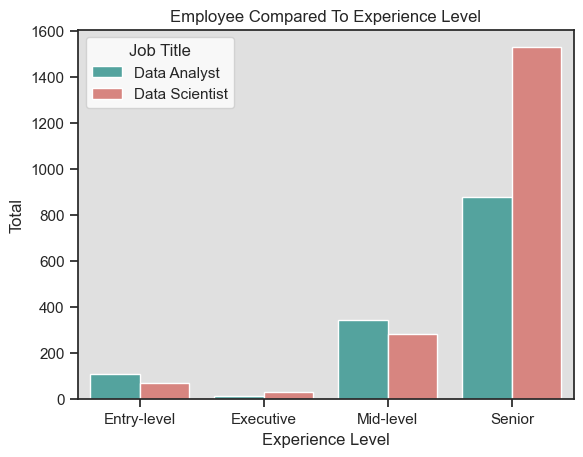

In [21]:
# Plot a bargraph using seaborn and matplotlib
# Comparing Experience Level using exp_level

# Creating barplot using seaborn
ax=sns.barplot(
    x="experience_level", 
    y="total",
    hue="job_title",
    palette = ['#47b0aa','#e57872'],
    data=exp_level
    )
ax.set_facecolor("#e0e0e0")

# Add labels and Titles using matplotlib
plt.xlabel("Experience Level")
plt.ylabel("Total")
plt.title("Employee Compared To Experience Level")
plt.legend(title="Job Title")

# Show plot
plt.show()

In [12]:
# Query comparing employment type to Job title
# Full time or Part time
query1 = """select job_title, employment_type, count(employment_type) as total
from job_sorted
group by job_title , employment_type"""


employ_total = pq.sqldf(query1, locals())
print(employ_total)

        job_title employment_type  total
0    Data Analyst       Full-time   1345
1    Data Analyst       Part-time      3
2  Data Scientist       Full-time   1912
3  Data Scientist       Part-time      2


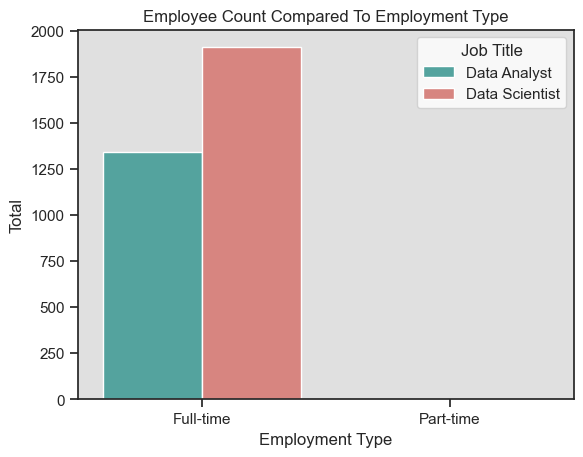

In [13]:

bx=sns.barplot(
    x="employment_type", 
    y="total",
    hue="job_title",
    palette = ['#47b0aa','#e57872'],
    data=employ_total
    )
bx.set_facecolor("#e0e0e0")


sns.set_style('ticks')
plt.xlabel("Employment Type")
plt.ylabel("Total")
plt.title("Employee Count Compared To Employment Type")
plt.legend(title="Job Title")
plt.show()

In [14]:
query2 = """select Job_title, work_setting , count(work_setting) as total
from job_sorted
group by job_title, work_setting"""

work_total = pq.sqldf(query2 , locals())
print(work_total)

        job_title work_setting  total
0    Data Analyst       Hybrid      8
1    Data Analyst    In-person    763
2    Data Analyst       Remote    577
3  Data Scientist       Hybrid     15
4  Data Scientist    In-person   1126
5  Data Scientist       Remote    773


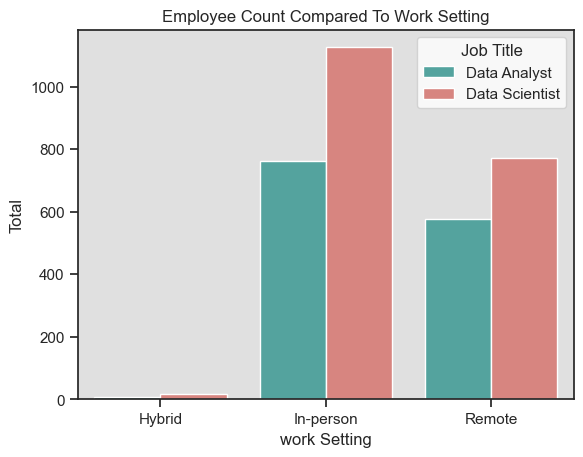

In [15]:
cx=sns.barplot(
    x="work_setting", 
    y="total",
    hue="job_title",
    palette = ['#47b0aa','#e57872'],
    data=work_total
    )
cx.set_facecolor("#e0e0e0")


sns.set_style('ticks')
plt.xlabel("work Setting")
plt.ylabel("Total")
plt.title("Employee Count Compared To Work Setting")
plt.legend(title="Job Title")
plt.show()

In [16]:
query2 = """select job_title, round(avg(salary),2) as avg_salary, min(salary) as min_salary, max(salary) as max_salary
from job_sorted
group by job_title"""

job_salary = pq.sqldf(query2 , locals())
job_salary

,job_title,avg_salary,min_salary,max_salary
0,Data Analyst,111416.57,20000,430967
1,Data Scientist,160265.39,24000,412000


In [17]:
query3 = """select job_title, employment_type, round(avg(salary),2) as avg_salary, count(employment_type) as count
from job_sorted
group by job_title, employment_type"""

empoly_salary = pq.sqldf(query3 , locals())
empoly_salary

,job_title,employment_type,avg_salary,count
0,Data Analyst,Full-time,111527.58,1345
1,Data Analyst,Part-time,61646.67,3
2,Data Scientist,Full-time,160332.98,1912
3,Data Scientist,Part-time,95650.00,2


In [18]:
query4 = """Select job_title, employment_type, experience_level, round(avg(salary),2) as avg_salary
from job_sorted
group by job_title, employment_type, experience_level"""

sal_table = pq.sqldf(query4, locals())
sal_table

,job_title,employment_type,experience_level,avg_salary
0,Data Analyst,Full-time,Entry-level,74872.24
1,Data Analyst,Full-time,Executive,114107.14
2,Data Analyst,Full-time,Mid-level,100520.03
3,Data Analyst,Full-time,Senior,120246.45
4,Data Analyst,Part-time,Entry-level,61646.67
5,Data Scientist,Full-time,Entry-level,99546.87
6,Data Scientist,Full-time,Executive,188563.07
7,Data Scientist,Full-time,Mid-level,123595.06
8,Data Scientist,Full-time,Senior,169330.28
9,Data Scientist,Part-time,Entry-level,95650.00


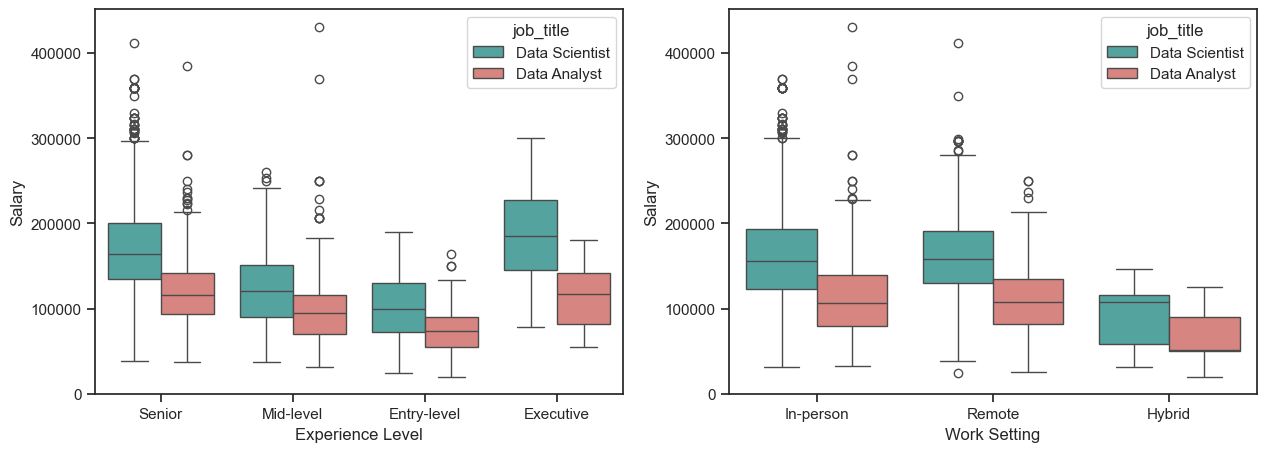

In [28]:
# Create a Box and Whisker plot for Experience Level and work setting

plt.figure(figsize = (15,5))

# Design and Plotting
plt.subplot(121)
sns.boxplot(data = job_sorted, x= 'experience_level', y = 'salary', hue = 'job_title')
plt.xlabel('Experience Level')
plt.ylabel('Salary')


plt.subplot(122)
sns.boxplot(data = job_sorted, x= 'work_setting', y = 'salary', hue = 'job_title')
plt.xlabel('Work Setting')
plt.ylabel('Salary')
plt.show()

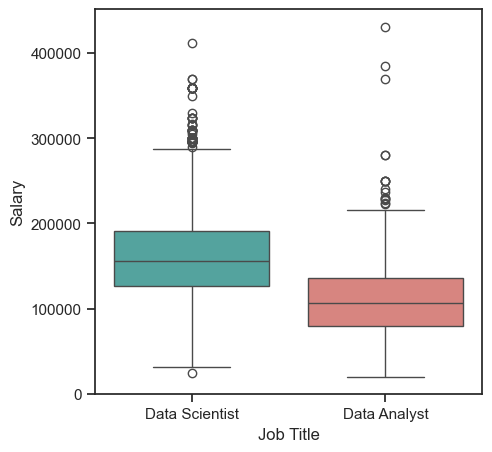

In [20]:
# Creating a Box and Whisker plot for salaries for both Data Analyst and Data Scientist
plt.figure(figsize = (5,5))

# Design and plotting
sns.boxplot(data = job_sorted, x = 'job_title', y ='salary', hue = 'job_title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()